In [1]:
import tensorflow as tf
import pandas as pd
import ast
!pip install -U nltk
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install -U gensim
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import SpectralClustering

!pip install -U ipywidgets

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
!pip install -U seaborn
import seaborn as sns
from nltk.data import find

!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import logging
from transformers import logging as hf_logging
from transformers import LongformerModel, LongformerTokenizer

import torch

D0529 10:08:21.982624035      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0529 10:08:21.982652251      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0529 10:08:21.982655551      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0529 10:08:21.982658005      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0529 10:08:21.982660218      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0529 10:08:21.982662647      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0529 10:08:21.982664944      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0529 10:08:21.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--


     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.5 MB 8.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 24.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/771.9 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 32.3 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/26.5 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/26.5 MB 9.3 MB/s eta 0:00:03
     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/26.5 MB 34.9 MB/s eta 0:00:01


     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/26.5 MB 67.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 11.8/26.5 MB 126.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 16.1/26.5 MB 127.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 20.8/26.5 MB 123.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 25.5/26.5 MB 128.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 129.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 19.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/56.8 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 5.0 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/138.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 KB 4.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.1 MB ? eta -:--:--


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/2.1 MB 27.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.1/2.1 MB 41.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/198.2 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 KB 15.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/293.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 286.7/293.3 KB 8.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.2 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/86.0 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.3 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.1 MB ? eta -:--:--


     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/7.1 MB 29.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 5.4/7.1 MB 77.9 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 86.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.3 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/224.5 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 KB 16.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/160.1 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 KB 14.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.6/7.8 MB 138.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.8/7.8 MB 134.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.8/7.8 MB 134.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.5 MB/s eta 0:00:00


 \

 done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=daec94acae733db03c1a625a06fa171a1c4369b1e3e7d98b516a22ac4f2bfc0b
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
full_data = pd.read_csv('/kaggle/input/movieplotsummarydata/FinalMovieData.tsv', delimiter='\t')
full_data['Genres'] = full_data['Genres'].apply(ast.literal_eval)

In [3]:
import dateutil.parser
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def parse_date(date):
    if isinstance(date, str):
        try:
            parsed_date = dateutil.parser.parse(date)
            return pd.Timestamp(parsed_date.year, parsed_date.month, parsed_date.day)
        except Exception as e:
            print(f"Error parsing date '{date}': {e}")
            parts = date.split('-')
            if len(parts) == 2:
                try:
                    return pd.Timestamp(int(parts[0]), int(parts[1]), 1)
                except Exception as e:
                    print(f"Error parsing date '{date}': {e}")
                    return None
            else:
                try:
                    return pd.Timestamp(int(parts[0]), 1, 1)
                except Exception as e:
                    print(f"Error parsing date '{date}': {e}")
                    return None
    else:
        return None


# Then apply this function as before and see the printed output.
full_data['Date'] = full_data['Date'].apply(parse_date)

# Drop rows with None in 'Date'
full_data = full_data.dropna(subset=['Date'])

full_data = full_data[full_data['Date'].apply(lambda x: x.year >= 2000)]

# Drop rows with missing 'Country' values
full_data = full_data.dropna(subset=['Country'])

# Convert 'Country' column to dict
full_data['Country'] = full_data['Country'].apply(ast.literal_eval)

# Filter out movies that weren't made in the United States
full_data = full_data[full_data['Country'].apply(lambda x: 'United States of America' in x.values())]


In [5]:
# Create a mask where each element is True if "Thriller" is in the values of the dictionary, and False otherwise
mask = full_data['Genres'].apply(lambda d: 'Thriller' in d.values())
thrillers = full_data[['ID', 'Plot Summary', 'Title']] # add [mask] to filter by Thrillers

summaries = thrillers['Plot Summary']

summaries_small = thrillers['Plot Summary'][:1800].reset_index(drop=True)
titles_small = thrillers['Title'][:1800].reset_index(drop=True)
ids_small = thrillers['ID'][:1800].reset_index(drop=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# print(summaries_small)

In [9]:
# Set TPU strategy
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [10]:
import tensorflow as tf
from transformers import TFLongformerModel, LongformerTokenizer
import numpy as np
import gc
import time
import sys

# Tokenize all the summaries
def longformer_tokenize_data(tokenizer, summaries):
    tokenized_summaries = []
    for summary in summaries:
        # Tokenize the text
        tokenized_summary = tokenizer(summary, truncation=True, max_length=4096, padding='max_length', return_tensors="tf")
        tokenized_summaries.append(tokenized_summary)
    return tokenized_summaries

# Wrap the model call in strategy.scope
with strategy.scope():
    model = TFLongformerModel.from_pretrained('allenai/longformer-base-4096')

# Instantiate the Longformer model and tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize summaries with LongformerTokenizer
#start = time.time()
processed_data = longformer_tokenize_data(tokenizer, summaries_small)
#stop = time.time()
#print("Tokenizer Step for all summaries: ", stop - start, " seconds")
#print("\n")

with strategy.scope():
    # Process the data
    summary_embeddings = []
    for i, data in enumerate(processed_data):
        #start2 = time.time()
        input_ids = data['input_ids']
        attention_mask = data['attention_mask']
        outputs = model(input_ids, attention_mask=attention_mask)
        summary_embeddings.append(outputs[0])
        #stop2 = time.time()
        #print("Time for embedding ", i, ": ", stop2 - start2, " seconds")

# Reshape output embeddings by taking the mean across sequence_length dimension
# and squeezing to remove batch_size dimension
embeddings = [np.mean(x.numpy(), axis=1).squeeze() for x in summary_embeddings]

# Memory Cleanup
del summary_embeddings
gc.collect()

# Set print options
np.set_printoptions(threshold=sys.maxsize)

embeddings = np.array(embeddings)

np.save('/kaggle/working/summary_embeddings.npy', embeddings)

# Output: NumPy array of vector embeddings
print(embeddings.shape)

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


(1800, 768)


In [11]:
from sklearn.cluster import SpectralClustering

number_of_clusters = 360

# Perform clustering
clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=7).fit(embeddings)

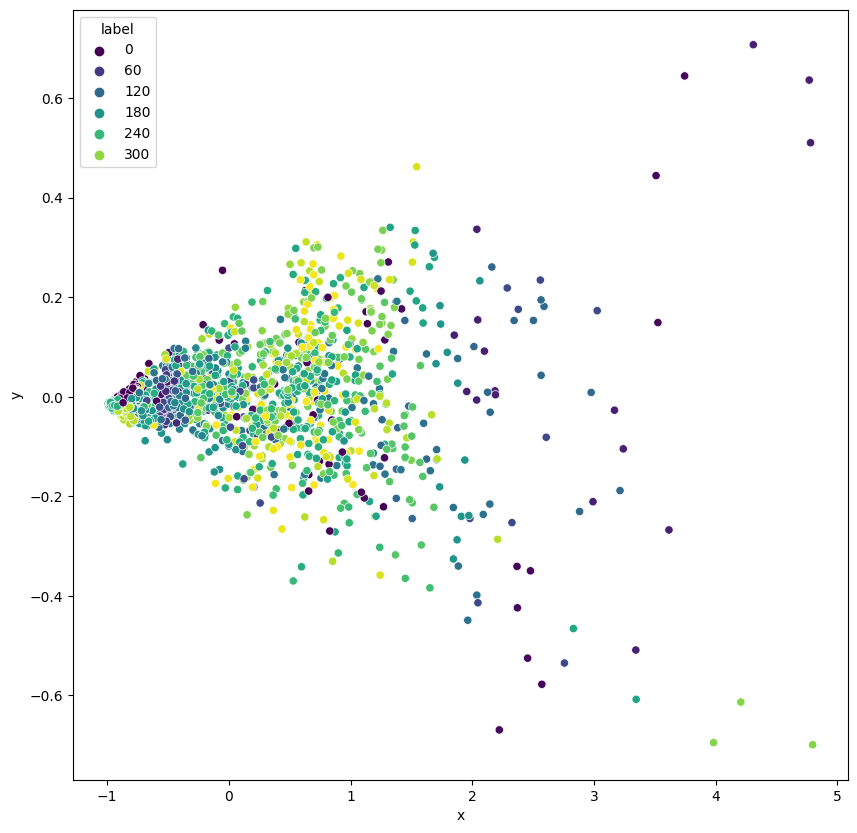

Cluster 0 summaries:
            ID                                    Title                                            Summary
13    21878654                SpongeBob vs. The Big One  The episode starts at the Krusty Krab, when Sp...
100   13289421                                Delirious  Toby and Les meet when Toby interrupts a crowd...
175   12260258  The King of Kong: A Fistful of Quarters  In Ottumwa, Iowa, Walter Day founded Twin Gala...
200    4515396                             Stormbreaker  Alex Rider is a 14-year-old schoolboy who live...
462   23092448                           Little Fockers  Gaylord "Greg" Focker  is preparing to celebra...
508    4760936                                 Insomnia  In the small fishing town of Nightmute, Alaska...
661    2426058                                    Proof  The film opens with the 27-year-old protagonis...
662     870946                     The Bourne Supremacy  Two years after his escape from France, Jason ...
667   34312285  

          ID              Title                                            Summary
703  4451440  Whatever It Takes  Ryan  is a bit of a geek with eyes for the sch...


Cluster 211 summaries:
            ID                            Title                                            Summary
331   27604230                          Sironia  Inspired by the music of singer-songwriter Wes...
428   12985644                   Feel the Noise  After a run-in with local thugs, a Harlem born...
524   34423644                           Broke*  Broke* begins two years in the past, at the be...
527   31060595                        The Union  In November 2009, filmmaker Cameron Crowe bega...
553   17294536                It Might Get Loud  The film documents the varied playing and reco...
1130   3492397                       Slipstream  Stuart Conway  has developed a hand-held, cell...
1316  12784721            No Sleep Til Shanghai  Riding the notoriety of winning the weekly Fre...
1443    993226   

Empty DataFrame
Columns: [ID, Title, Summary]
Index: []


Cluster 315 summaries:
Empty DataFrame
Columns: [ID, Title, Summary]
Index: []


Cluster 316 summaries:
            ID                   Title                                            Summary
159   25871790                  Kaboom  {{Plot}} Smith is an 18-year-old film student ...
380   14790659   My Best Friend's Girl  Sherman 'Tank' Turner  is a hack comedian with...
735    7690015      The Pretender 2001  The story reunites the entire cast from the se...
1232  31009222               Project X   In Pasadena, high school students Costa and J...
1531   9975140                D.E.B.S.  A narrator explains that there is a test hidde...
1676  36203902  Agents of Secret Stuff  Teenager Aden  has been training as an agent w...


Cluster 317 summaries:
Empty DataFrame
Columns: [ID, Title, Summary]
Index: []


Cluster 318 summaries:
            ID                                          Title                                         

In [12]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the processed_data_array
num_samples, embedding_dim = embeddings.shape

reshaped_data_array = embeddings.reshape(num_samples, embedding_dim)

# PCA for dimension reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reshaped_data_array)

# Create a DataFrame for easy plotting
df = pd.DataFrame(reduced_data, columns=['x', 'y'])
df['label'] = clustering.labels_
df['Title'] = titles_small
df['Summary'] = summaries_small
df['ID'] = ids_small

# Plot using seaborn
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='viridis', legend=True)
plt.show()

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

# Print out summaries from each cluster
for i in range(number_of_clusters):  # Change this range depending on which clusters you want to look at
    print(f'Cluster {i} summaries:')
    print(df[df['label'] == i][['ID', 'Title', 'Summary']])
    print('\n')



In [13]:
# cluster_counts = df['label'].value_counts()
# largest_cluster = cluster_counts.idxmax()
# largest_cluster_size = cluster_counts.max()

# print(f"The largest cluster is: {largest_cluster} with size: {largest_cluster_size}")